In [2]:
import pystac
items = pystac.ItemCollection.from_file("geospatial-python-raster-dataset/search.json")

In [71]:
import rioxarray
raster_ams_b9 = rioxarray.open_rasterio(items[0].assets["B09"].href)
raster_ams_b9

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

### Visualize w/ rio

In [62]:
print(raster_ams_b9.rio.crs)
print(raster_ams_b9.rio.nodata)
print(raster_ams_b9.rio.bounds())
print(raster_ams_b9.rio.width)
print(raster_ams_b9.rio.height)

EPSG:32631
0
(600000.0, 5790240.0, 709800.0, 5900040.0)
1830
1830


In [63]:
raster_ams_b9.values

array([[[    0,     0,     0, ...,  8888,  9075,  8139],
        [    0,     0,     0, ..., 10444, 10358,  8669],
        [    0,     0,     0, ..., 10346, 10659,  9168],
        ...,
        [    0,     0,     0, ...,  4295,  4289,  4320],
        [    0,     0,     0, ...,  4291,  4269,  4179],
        [    0,     0,     0, ...,  3944,  3503,  3862]]], dtype=uint16)

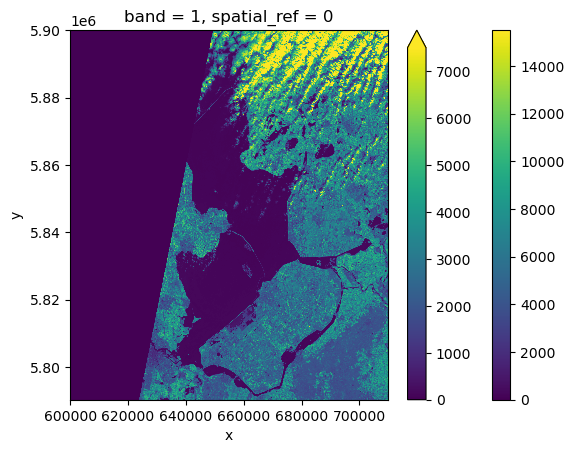

In [64]:
raster_ams_b9.plot()
raster_ams_b9.plot(robust=True)

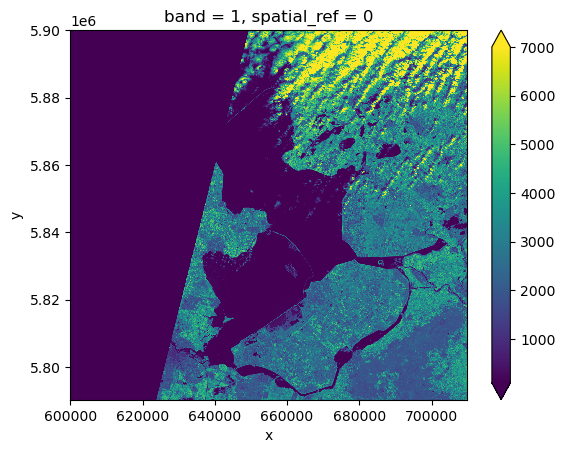

In [65]:
raster_ams_b9.plot(vmin=100, vmax=7000)

### CRS transformation

In [25]:
from pyproj import CRS
epsg = raster_ams_b9.rio.crs.to_epsg() # crs as an int
crs = CRS(epsg)
crs
# crs.area_of_use

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
# help(crs)
# dir(crs)
# crs.axis_info
for axis in crs.axis_info:
    print(axis)
# raster_ams_b9.rio.crs.linear_units 

E[east]: Easting (metre)
N[north]: Northing (metre)


### Raster Stats

In [73]:
print(raster_ams_b9.min())
print(raster_ams_b9.max())
print(raster_ams_b9.mean())
print(raster_ams_b9.std())
print(raster_ams_b9.quantile([0.25, 0.75]))

<xarray.DataArray ()>
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(15497, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(1652.44009944)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2049.16447495)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray (quantile: 2)>
array([   0., 2911.])
Coordinates:
  * quantile  (quantile) float64 0.25 0.75


In [67]:
import numpy
print(numpy.percentile(raster_ams_b9, 25))
print(numpy.percentile(raster_ams_b9, 75))

0.0
2911.0


In [68]:
# help(raster_ams_b9.quantile)
?raster_ams_b9.percentile

Object `raster_ams_b9.percentile` not found.


### Handling no data

In [88]:
raster_ams_b9_nan = rioxarray.open_rasterio(items[0].assets["B09"].href, masked=True)
raster_ams_b9_nan.where(raster_ams_b9 != raster_ams_b9.rio.nodata)

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
array([[[   nan,    nan,    nan, ...,  8888.,  9075.,  8139.],
        [   nan,    nan,    nan, ..., 10444., 10358.,  8669.],
        [   nan,    nan,    nan, ..., 10346., 10659.,  9168.],
        ...,
        [   nan,    nan,    nan, ...,  4295.,  4289.,  4320.],
        [   nan,    nan,    nan, ...,  4291.,  4269.,  4179.],
        [   nan,    nan,    nan, ...,  3944.,  3503.,  3862.]]],
      dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [84]:
print(raster_ams_b9.min())
print(raster_ams_b9.max())
print(raster_ams_b9.mean())
print(raster_ams_b9.std())

<xarray.DataArray ()>
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(15497, dtype=uint16)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(1652.44009944)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(2049.16447495)
Coordinates:
    spatial_ref  int64 0


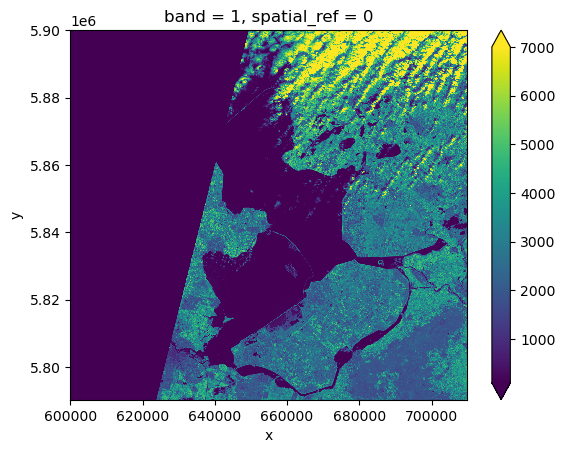

In [85]:
raster_ams_b9_nan.plot(vmin=100, vmax=7000)

### Multi band rasters

In [89]:
raster_ams_overview = rioxarray.open_rasterio(items[0].assets['overview'].href)
raster_ams_overview

<xarray.DataArray (band: 3, y: 343, x: 343)>
[352947 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.002e+05 6.005e+05 ... 7.093e+05 7.096e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.899e+06 ... 5.791e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [90]:
raster_ams_overview.shape

(3, 343, 343)

In [93]:
# raster_ams_overview.plot.imshow()
raster_ams_overview.plot.imshow(aspect="equal")

type: plt.imshow's `aspect` kwarg is not available in xarray